In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel('heart.xlsx')

In [3]:
df_train, df_test = train_test_split(data, test_size=0.3, random_state=42)

In [4]:
train = df_train
test = df_test

In [5]:
train.shape

(189, 14)

In [6]:
test.shape

(81, 14)

In [7]:
train.describe()

,age,sex,chest pain type (4 values),resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,"resting electrocardiographic results (values 0,1,2)",maximum heart rate achieved,exercise induced angina,oldpeak = ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flourosopy,thal: 3 = normal; 6 = fixed defect; 7 = reversable defect,class
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,54.751323,0.693122,3.211640,131.809524,251.529101,0.137566,1.042328,149.317460,0.370370,1.155556,1.608466,0.698413,4.783069,1.465608
std,9.132393,0.462423,0.966278,17.952233,52.554890,0.345359,0.999099,22.877443,0.484186,1.195707,0.614655,0.967035,1.948957,0.500141
min,29.000000,0.000000,1.000000,94.000000,141.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,215.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
50%,56.000000,1.000000,4.000000,130.000000,244.000000,0.000000,2.000000,154.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000
75%,62.000000,1.000000,4.000000,140.000000,282.000000,0.000000,2.000000,166.000000,1.000000,1.800000,2.000000,1.000000,7.000000,2.000000
max,74.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,2.000000


In [8]:
import seaborn
import matplotlib.pyplot as plt

def plot_df(df, name):
  corr = df[df.columns].corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  plt.figure(figsize=(20, 15))
  seaborn.set(font_scale=1.2)
  seaborn.heatmap(corr, mask=mask, center=0, annot=True,
    square=True, linewidths=3, alpha=0.7)
  plt.title(name)

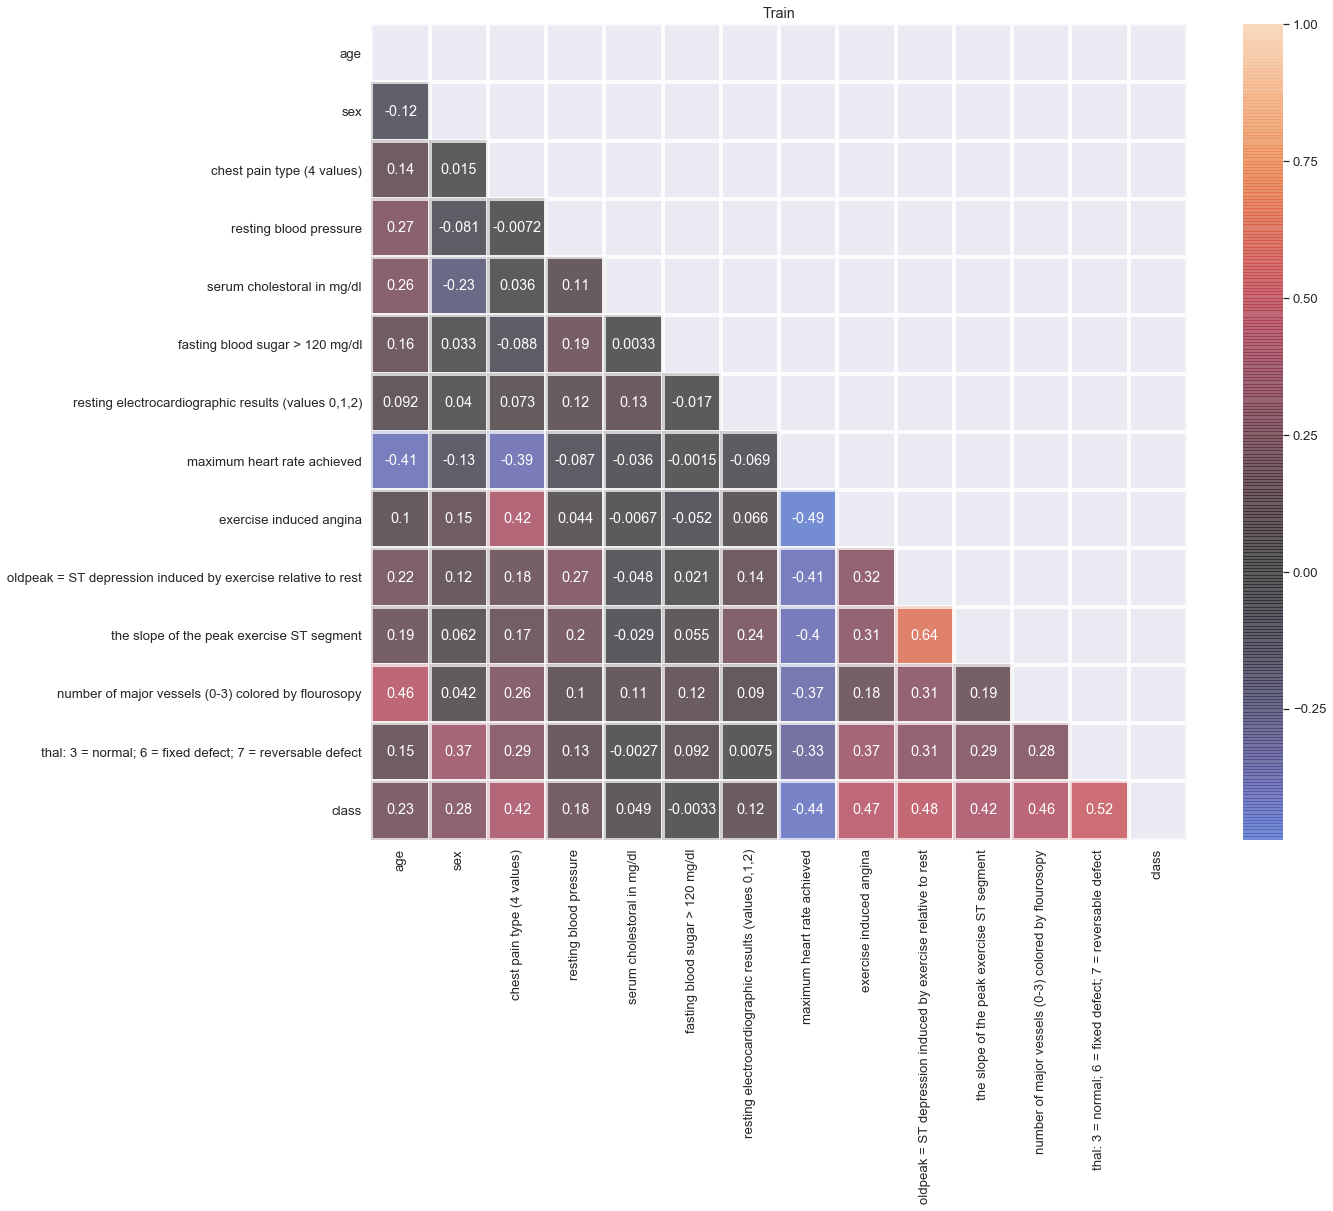

In [9]:
plot_df(train, 'Train')

In [10]:
print(train.columns)

Index(['age', 'sex', 'chest pain type (4 values)', 'resting blood pressure',
       'serum cholestoral in mg/dl', 'fasting blood sugar > 120 mg/dl',
       'resting electrocardiographic results (values 0,1,2)',
       'maximum heart rate achieved', 'exercise induced angina',
       'oldpeak = ST depression induced by exercise relative to rest',
       'the slope of the peak exercise ST segment',
       'number of major vessels (0-3) colored by flourosopy',
       'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect', 'class'],
      dtype='object')


In [11]:
class_name = input("Chooese the class: ")

Chooese the class: class


In [12]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [13]:
tr_ans = train[class_name]
ts_ans = test[class_name]
class_count = len(tr_ans.unique())
print(class_count)

2


In [14]:
tr_data = train.drop([class_name], axis=1)
ts_data = test.drop([class_name], axis=1)

In [15]:
# #결측치 채우기 if 결측치가 0일 경우

# from sklearn.impute import SimpleImputer

# rep_0 = SimpleImputer(missing_values=0, strategy="mean")

# tr_data = rep_0.fit_transform(tr_data)
# ts_data = rep_0.fit_transform(ts_data)

#결측치 채우기 if 결측치가 ?일 경우

# from sklearn.impute import SimpleImputer

# rep_0 = SimpleImputer(missing_values='?', strategy="mean")

# tr_data = rep_0.fit_transform(tr_data)
# ts_data = rep_0.fit_transform(ts_data)

In [16]:
mm_tr_data = minmax_scaler.fit_transform(tr_data)
mm_ts_data = minmax_scaler.transform(ts_data)
std_tr_data = standard_scaler.fit_transform(tr_data)
std_ts_data = standard_scaler.transform(ts_data)
tr_ans = np.array(tr_ans)
ts_ans = np.array(ts_ans)

C:\Users\LeeDongJae\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\LeeDongJae\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LeeDongJae\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\LeeDongJae\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [17]:
tr_ans

array([1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1], dtype=int64)

In [18]:
ts_ans

array([2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int64)

In [19]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn import metrics
from tensorflow.keras.regularizers import l2


In [20]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [21]:
# real Version


def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', 
                 activation = 'elu', kernel_regularizer=l2(0.001)):
  model = Sequential()
  model.add(Dense(neurons, input_dim=len(mm_tr_data.T), kernel_initializer=init_mode, activation=activation))
  for i in range(hidden_layers):
    
    model.add(Dense(neurons, kernel_initializer=init_mode, kernel_regularizer=kernel_regularizer))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))
  
  if class_count == 2:  
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  elif class_count != 2:
    model.add(Dense(class_count, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
  return model

In [22]:
keras_model = KerasClassifier(build_fn=create_model, epochs=64, batch_size=16)

In [23]:
leaky_relu = tf.nn.leaky_relu
hidden_layers = [4,8,16]
neurons = [32, 64, 128]
activation = ['elu', leaky_relu]
init_mode = ['glorot_uniform', 'he_normal']

In [24]:
param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
minmax_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)
std_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
minmax_grid_result = minmax_grid.fit(mm_tr_data, tr_ans)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/64
189/189 [==============================] - 6s 33ms/sample - loss: 1.8318 - acc: 0.5026
Epoch 2/64
189/189 [==============================] - 0s 904us/sample - loss: 1.8144 - acc: 0.5238
Epoch 3/64
189/189 [==============================] - 0s 867us/sample - loss: 1.8194 - acc: 0.5344
Epoch 4/64
189/189 [==============================] - 0s 878us/sample - loss: 1.8252 - acc: 0.5291
Epoch 5/64
189/189 [==============================] - 0s 888us/sample - loss: 1.8600 - acc: 0.4815
Epoch 6/64
189/189 [==============================] - 0s 999us/sample - loss: 1.7278 - acc: 0.5820
Epoch 7/64
189/189 [==============================] - 0s 1ms/sample - loss: 1.7410 - acc: 0.5503
Epoch 8/64
189/189 [==============================] - 0s 920us/sample - los

In [27]:
std_grid_result = std_grid.fit(std_tr_data, tr_ans)

Epoch 1/64
189/189 [==============================] - 6s 34ms/sample - loss: 1.7683 - acc: 0.5503
Epoch 2/64
189/189 [==============================] - 0s 894us/sample - loss: 1.7515 - acc: 0.5820
Epoch 3/64
189/189 [==============================] - 0s 878us/sample - loss: 1.8354 - acc: 0.4868
Epoch 4/64
189/189 [==============================] - 0s 862us/sample - loss: 1.7137 - acc: 0.5926
Epoch 5/64
189/189 [==============================] - 0s 883us/sample - loss: 1.7376 - acc: 0.6349
Epoch 6/64
189/189 [==============================] - 0s 873us/sample - loss: 1.7508 - acc: 0.6243
Epoch 7/64
189/189 [==============================] - 0s 878us/sample - loss: 1.6473 - acc: 0.6878
Epoch 8/64
189/189 [==============================] - 0s 941us/sample - loss: 1.5361 - acc: 0.7460
Epoch 9/64
189/189 [==============================] - 0s 920us/sample - loss: 1.5634 - acc: 0.7302s - loss: 1.5625 - acc: 0.76
Epoch 10/64
189/189 [==============================] - 0s 962us/sample - loss: 1.5

In [28]:
print("Scaler = minmax")
print("Best: %f using %s" % (minmax_grid_result.best_score_, minmax_grid_result.best_params_))
means = minmax_grid_result.cv_results_['mean_test_score']
stds = minmax_grid_result.cv_results_['std_test_score']
params = minmax_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = minmax
Best: 0.830688 using {'activation': <function leaky_relu at 0x000001D73A06A840>, 'hidden_layers': 16, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.804233 (0.019797) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.761905 (0.012960) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.804233 (0.014965) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.820106 (0.039594) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.793651 (0.022448) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.777778 (0.022448) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.793651 (0.025921) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.783069 (0.039594) with: {'activation': 'elu', 'hi

In [29]:
print("Scaler = standard")
print("Best: %f using %s" % (std_grid_result.best_score_, std_grid_result.best_params_))
means = std_grid_result.cv_results_['mean_test_score']
stds = std_grid_result.cv_results_['std_test_score']
params = std_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = standard
Best: 0.825397 using {'activation': 'elu', 'hidden_layers': 16, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.814815 (0.007483) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.804233 (0.007483) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.793651 (0.012960) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.793651 (0.012960) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.783069 (0.007483) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.804233 (0.007483) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.814815 (0.014965) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.788360 (0.019797) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'gloro

In [30]:
pred = minmax_grid.predict(mm_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.8271604938271605
Confusion Matrix
[[44  5]
 [ 9 23]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.83      0.90      0.86        49
         2.0       0.82      0.72      0.77        32

   micro avg       0.83      0.83      0.83        81
   macro avg       0.83      0.81      0.81        81
weighted avg       0.83      0.83      0.82        81



In [31]:
pred = std_grid.predict(std_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.8024691358024691
Confusion Matrix
[[44  5]
 [11 21]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.80      0.90      0.85        49
         2.0       0.81      0.66      0.72        32

   micro avg       0.80      0.80      0.80        81
   macro avg       0.80      0.78      0.79        81
weighted avg       0.80      0.80      0.80        81



In [32]:
# # testbed Version


# def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', activation = 'elu'):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=len(tr_data.T), kernel_initializer=init_mode, activation=activation))

#     for i in range(hidden_layers):
        
#         model.add(Dense(neurons, kernel_initializer=init_mode))
#         model.add(BatchNormalization())
#         model.add(Activation(activation))
#         model.add(Dropout(0.2))
  
#     if class_count == 2:  
#         model.add(Dense(1,activation='sigmoid'))
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     elif class_count != 2:
#         model.add(Dense(class_count-1, activation='softmax'))
#         model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#     return model


# hidden_layers = [5, 10]
# neurons = [32, 64]
# activation = ['elu']
# init_mode = ['he_uniform']

# keras_model = KerasClassifier(build_fn=create_model, epochs=4, batch_size=4)

# param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
# grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=2)